In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [63]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [64]:
del df['Row ID']

In [65]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


# 📊 Exploratory Data Analysis (EDA) – Sales Dataset

## 1. Visão Geral do Dataset
**Objetivo:**  
Compreender o comportamento das vendas, clientes, produtos, regiões e a rentabilidade do negócio.


# Summary

Quantos registos existem no dataset?

In [66]:
print(f"{df.shape[0]} registros.")

9994 registros.


Quantas encomendas únicas existem?

In [67]:
df['Order ID'].nunique()

5009

Quantos clientes distintos (`Customer ID`) existem?

In [68]:
df['Customer ID'].nunique()

793

Quantos produtos diferentes foram vendidos?

In [69]:
df['Product ID'].nunique()

1862

Qual é o total de vendas?

In [70]:
df['Sales'].sum()

2297200.8603000003

Qual é o lucro total?

In [71]:
df['Profit'].sum()

286397.0217

# Insights

O volume de vendas é proporcional ao lucro obtido?


In [72]:
print(f"{round(df['Sales'].corr(df['Profit']), 1)}: Moderadamente.")


0.5: Moderadamente.


O dataset representa mais vendas pontuais ou clientes recorrentes?

In [73]:
# Número de compras por cliente
vendas_por_cliente = df.groupby('Customer ID')['Order ID'].nunique()

# Clientes pontuais
pontuais = (vendas_por_cliente == 1).sum()

# Clientes recorrentes
recorrentes = (vendas_por_cliente > 1).sum()

print(f"Clientes pontuais: {pontuais}")
print(f"Clientes recorrentes: {recorrentes}")


Clientes pontuais: 12
Clientes recorrentes: 781



## 2. Análise Temporal

### Summary

Como as vendas evoluem ao longo do tempo (ano/mês)?

In [74]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


Agrupamento por ano

In [79]:
vendas_ano = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
print(vendas_ano)

Order Date
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64


Agrupamento por mês

In [21]:
vendas_mes = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().head(4)
print(vendas_mes)


Order Date
2014-01    14236.895
2014-02     4519.892
2014-03    55691.009
2014-04    28295.345
Freq: M, Name: Sales, dtype: float64


Qual é o tempo médio entre a data do pedido e a data de envio?

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [23]:
df['Tempo_Envio'] = (df['Ship Date'] - df['Order Date']).dt.days


In [24]:
tempo_medio = df['Tempo_Envio'].mean()
print(f"Tempo médio entre pedido e envio: {round(tempo_medio)} dias")


Tempo médio entre pedido e envio: 4 dias


Existem períodos com maior volume de vendas?


In [25]:
# Agrupar por mês
vendas_mes = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Ordenar do maior para o menor e pegar os 3 primeiros
top3_periodos = vendas_mes.sort_values(ascending=False).head(3)

print("Top 3 períodos com maior volume de vendas:")
print(top3_periodos)



Top 3 períodos com maior volume de vendas:
Order Date
2017-11    118447.825
2016-12     96999.043
2017-09     87866.652
Freq: M, Name: Sales, dtype: float64


### Insights

Existe sazonalidade nas vendas?

In [26]:
vendas_mes = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
vendas_mes.head(3)

Order Date
2014-01    14236.895
2014-02     4519.892
2014-03    55691.009
Freq: M, Name: Sales, dtype: float64

O tempo de envio pode estar a impactar a satisfação ou o lucro?

In [27]:
# Converter Ship Date em datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Transformar em número (dias desde o menor Ship Date)
df['ShipDate_num'] = (df['Ship Date'] - df['Ship Date'].min()).dt.days

# Calcular correlação
corr = df['ShipDate_num'].corr(df['Profit'])
print(f"{round(corr, 2)}: Não tem afectado")


0.0: Não tem afectado


## 3. Logística e Envio

### Summary

Qual é o modo de envio mais utilizado?

In [28]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

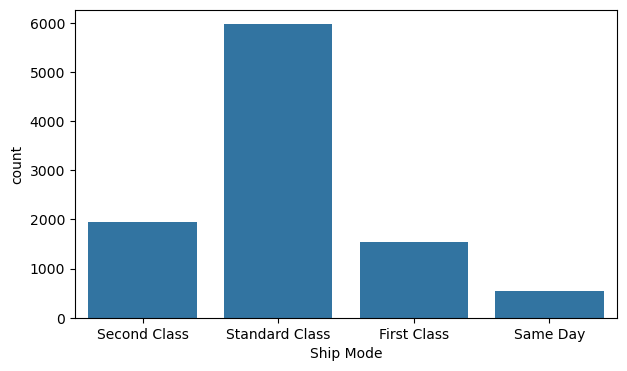

In [94]:
plt.figure(figsize=(7, 4))  
sns.countplot(x='Ship Mode', data=df)
plt.show()


Qual é o tempo médio de envio por modo?

In [29]:
tempo_medio_por_shipmode = df.groupby('Ship Mode')['Tempo_Envio'].mean()
round(tempo_medio_por_shipmode, 1)


Ship Mode
First Class       2.2
Same Day          0.0
Second Class      3.2
Standard Class    5.0
Name: Tempo_Envio, dtype: float64

Qual o total de vendas e lucro por modo de envio?

In [30]:
df.groupby('Ship Mode')[['Sales', 'Profit']].sum()

,Sales,Profit
Ship Mode,,
First Class,3.514284e+05,48969.8399
Same Day,1.283631e+05,15891.7589
Second Class,4.591936e+05,57446.6354
Standard Class,1.358216e+06,164088.7875


### Insights

Algum modo de envio está associado a maior lucro?

In [99]:
df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False)


Ship Mode
Standard Class    164088.7875
Second Class       57446.6354
First Class        48969.8399
Same Day           15891.7589
Name: Profit, dtype: float64

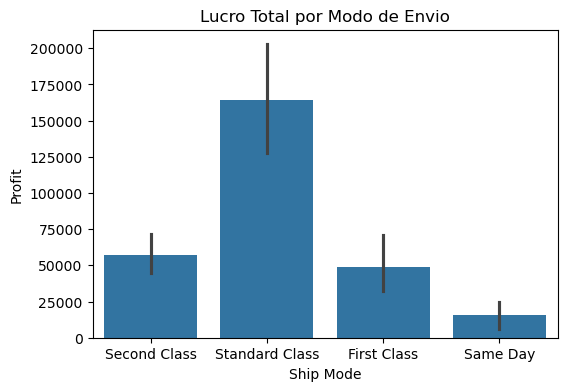

In [102]:
plt.figure(figsize=(6,4))
sns.barplot(x='Ship Mode', y='Profit', data=df, estimator=sum)
plt.title('Lucro Total por Modo de Envio')
plt.show()

Modos de envio mais rápidos justificam o custo?

In [32]:
# Tempo médio de envio por Ship Mode
tempo_medio = df.groupby('Ship Mode')['Tempo_Envio'].mean()

# Lucro médio por Ship Mode
lucro_medio = df.groupby('Ship Mode')['Profit'].mean()

# Combinar em um único dataframe
analise_shipmode = pd.DataFrame({
    'Tempo_medio_envio': tempo_medio,
    'Lucro_medio': lucro_medio
}).sort_values('Tempo_medio_envio')

print(analise_shipmode)


                Tempo_medio_envio  Lucro_medio
Ship Mode                                     
Same Day                 0.044199    29.266591
First Class              2.182705    31.839948
Second Class             3.238046    29.535545
Standard Class           5.006535    27.494770



## 4. Perfil do Cliente

### Summary

Qual segmento de cliente gera mais vendas?


In [104]:
df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

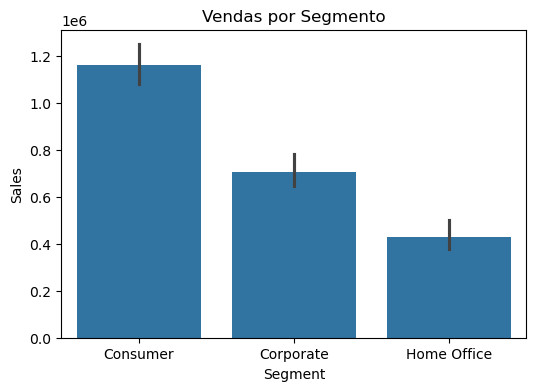

In [107]:
plt.figure(figsize=(6,4))
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum)
plt.title('Vendas por Segmento')
plt.show()

Qual segmento é mais lucrativo?

In [109]:
df.groupby('Segment')['Profit'].sum().sort_values(ascending=False).head(1)

Segment
Consumer    134119.2092
Name: Profit, dtype: float64

Quem são os clientes com maior volume de compras?'

In [108]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64

### Insights

Existem segmentos que compram muito mas geram pouco lucro?

In [36]:
df_segmento = df.groupby('Segment')[['Sales','Profit']].sum()
df_segmento['Margem'] = df_segmento['Profit'] / df_segmento['Sales']
print(df_segmento)


                    Sales       Profit    Margem
Segment                                         
Consumer     1.161401e+06  134119.2092  0.115481
Corporate    7.061464e+05   91979.1340  0.130255
Home Office  4.296531e+05   60298.6785  0.140343


O negócio depende excessivamente de poucos clientes?

In [37]:
vendas_por_cliente = df.groupby('Customer ID')['Sales'].sum()
vendas_por_cliente_ordenadas = vendas_por_cliente.sort_values(ascending=False)
top10 = vendas_por_cliente_ordenadas.head(10).sum()
total_vendas = vendas_por_cliente_ordenadas.sum()
proporcao_top10 = top10 / total_vendas
print(f"Top 10 clientes representam {proporcao_top10:.2%} das vendas")



Top 10 clientes representam 6.70% das vendas


## 5. Análise Geográfica

Quais regiões apresentam maior volume de vendas?


In [110]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

Quais regiões apresentam maior lucro?

In [111]:
df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

Quais estados ou cidades apresentam prejuízo?

Calcular prejuízo por Estado

In [40]:
prejuizo_estado = df.groupby('State')['Profit'].sum()
estados_prejuizo = prejuizo_estado[prejuizo_estado < 0]
print(estados_prejuizo)


State
Arizona           -3427.9246
Colorado          -6527.8579
Florida           -3399.3017
Illinois         -12607.8870
North Carolina    -7490.9122
Ohio             -16971.3766
Oregon            -1190.4705
Pennsylvania     -15559.9603
Tennessee         -5341.6936
Texas            -25729.3563
Name: Profit, dtype: float64


Calcular prejuízo por Cidade

In [41]:
prejuizo_cidade = df.groupby('City')['Profit'].sum()
cidades_prejuizo = prejuizo_cidade[prejuizo_cidade < 0]
print(cidades_prejuizo)


City
Abilene       -3.7584
Akron       -186.6356
Allen        -39.8775
Allentown   -226.4504
Altoona       -1.1835
               ...   
Waco        -520.1034
Wheeling    -107.3962
Wilson       -14.3360
York        -102.1692
Yuma        -465.9909
Name: Profit, Length: 116, dtype: float64



### Insights


Existem regiões com boas vendas mas margem negativa?

In [42]:
df_regiao = df.groupby('Region')[['Sales','Profit']].sum()
df_regiao['Margem'] = df_regiao['Profit'] / df_regiao['Sales']
print(df_regiao)


               Sales       Profit    Margem
Region                                     
Central  501239.8908   39706.3625  0.079216
East     678781.2400   91522.7800  0.134834
South    391721.9050   46749.4303  0.119343
West     725457.8245  108418.4489  0.149448


A localização influencia diretamente a rentabilidade?

Lucro médio por Estado


In [43]:
lucro_estado = df.groupby('State')['Profit'].mean().sort_values(ascending=False).head(3)
print(lucro_estado)


State
Vermont         204.088936
Rhode Island    130.100523
Indiana         123.375411
Name: Profit, dtype: float64


Lucro médio por Cidade

In [44]:
lucro_cidade = df.groupby('City')['Profit'].mean().sort_values(ascending=False).head(3)
print(lucro_cidade)


City
Jamestown       642.885750
Independence    487.831500
Lafayette       323.173794
Name: Profit, dtype: float64


## 6. Análise de Produtos

###  Summary

Quais categorias geram mais vendas?

In [112]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

Quais subcategorias geram mais lucro?

In [113]:
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64

Quais produtos são mais vendidos?


In [114]:
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
                                                                                 ...    
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                                 7.700
Grip Seal Envelopes                                                                7.072
Xerox 20                                                                           6.480
Avery 5                                                                            5.760
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                   1.624
Name: Sa

### Insights


Existem produtos que vendem bem mas dão prejuízo?


In [48]:
products_prejuizo = df.groupby('Product Name')['Profit'].sum()
prejuizo_product = products_prejuizo[products_prejuizo < 0]
print(prejuizo_product)


Product Name
3.6 Cubic Foot Counter Height Office Refrigerator                 -872.0752
36X48 HARDFLOOR CHAIRMAT                                           -40.4914
3D Systems Cube Printer, 2nd Generation, White                    -467.9964
3M Replacement Filter for Office Air Cleaner for 20' x 33' Room    -20.4768
ARKON Windshield Dashboard Air Vent Car Mount Holder               -15.5940
                                                                     ...   
XtraLife ClearVue Slant-D Ring Binders by Cardinal                 -13.3280
Zebra GK420t Direct Thermal/Thermal Transfer Printer              -938.2800
i.Sound Portable Power - 8000 mAh                                  -58.8189
iOttie HLCRIO102 Car Mount                                         -11.9940
iOttie XL Car Mount                                                -50.3748
Name: Profit, Length: 301, dtype: float64


Alguma categoria compromete o resultado financeiro?


In [49]:
cat_result = df.groupby('Category')[['Sales', 'Profit']].sum()
cat_result['Margem'] = cat_result['Profit'] / cat_result['Sales']
print(round(cat_result.sort_values('Margem'), 2))

                     Sales     Profit  Margem
Category                                     
Furniture        741999.80   18451.27    0.02
Office Supplies  719047.03  122490.80    0.17
Technology       836154.03  145454.95    0.17


## 7. Métricas Financeiras

 Qual é o lucro médio por pedido?

In [50]:
round(df.groupby('Order ID')['Profit'].sum().mean())

57

Qual é o lucro médio por produto?

In [51]:
round(df.groupby('Product Name')['Profit'].sum().mean())

155

 Qual a relação entre quantidade vendida e lucro?


In [52]:
round(df['Quantity'].corr(df['Profit']), 1)

0.1

### Insights


Vender mais significa lucrar mais?

In [53]:
round(df['Sales'].corr(df['Profit']), 1)

0.5

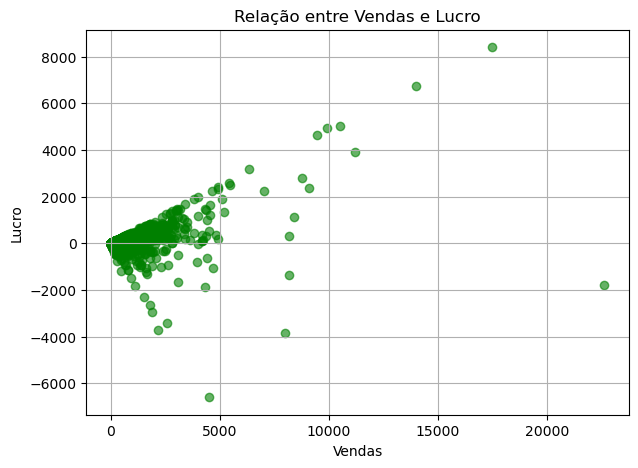

In [116]:
plt.figure(figsize=(7,5))
plt.scatter(df['Sales'], df['Profit'], alpha=0.6, color='green')
plt.title('Relação entre Vendas e Lucro')
plt.xlabel('Vendas')
plt.ylabel('Lucro')
plt.grid(True)
plt.show()


Há vendas recorrentes com prejuízo?

In [54]:
clientes_recorrentes = df.groupby('Customer ID')['Order ID'].nunique() > 1
df['Cliente_Recorrente'] = df['Customer ID'].map(clientes_recorrentes)
prejuizo_recorrente = df[(df['Cliente_Recorrente']) & (df['Profit'] < 0)]
prejuizo_recorrente.shape[0]


1867

## 8. Impacto do Desconto

Qual é o desconto médio aplicado?

In [55]:
round(df['Discount'].mean(), 2)

0.16

Como o lucro varia conforme o nível de desconto?

In [56]:
df[['Profit', 'Discount']]

,Profit,Discount
0,41.9136,0.00
1,219.5820,0.00
2,6.8714,0.00
3,-383.0310,0.45
4,2.5164,0.20
...,...,...
9989,4.1028,0.20
9990,15.6332,0.00
9991,19.3932,0.20
9992,13.3200,0.00


Qual o volume de vendas com desconto vs sem desconto?


Com Desconto & Sem Desconto(0.00)

In [57]:
df.groupby('Discount')['Sales'].mean()

Discount
0.00    226.742074
0.10    578.397351
0.15    529.971567
0.20    209.076940
0.30    454.742974
0.32    536.794770
0.40    565.134874
0.45    498.634000
0.50    892.705152
0.60     48.150000
0.70     97.177708
0.80     56.545853
Name: Sales, dtype: float64

### Insights

 Descontos elevados reduzem a rentabilidade?

In [58]:
df['Discount'].corr(df['Profit'])

-0.2194874563717678

- #### O desconto está a ser usado de forma estratégica ou excessiva?

A análise mostra que o desconto médio aplicado é 16% e que a maioria das vendas apresenta descontos entre 10% e 50%. A correlação entre desconto e lucro é -0,21, indicando que descontos maiores tendem a reduzir a rentabilidade. Isso sugere que os descontos estão sendo aplicados de forma moderada, mas é importante monitorar vendas com descontos mais altos, pois elas impactam negativamente a margem de lucro.